In [30]:
import matplotlib.pyplot as plt
from cmath import phase as arg, cos, sin, pi, sqrt, e

(1+0j)
(1.0000000000000002+0j)
(0.9999999999999998+0j)
(1+0j)
(1+0j)
(0.9999999999999998+0j)
(1+0j)
(1.0000000000000002+0j)
(1.0000000000000002+0j)
(1.0000000000000002+0j)
(1+0j)
(1.0000000000000002+0j)
(1.0000000000000002+0j)
(0.9999999999999998+0j)
(1.0000000000000002+0j)
(1+0j)
(1+0j)
(0.9999999999999996+0j)
(1.0000000000000004+0j)
(1+0j)
(0.9999999999999996+0j)
(1+0j)
(0.9999999999999996+0j)
(1+0j)
(1.0000000000000004+0j)
(1+0j)
(0.9999999999999996+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1.0000000000000004+0j)
(1.0000000000000004+0j)
(1+0j)
(0.9999999999999996+0j)
(1.0000000000000004+0j)
(1.0000000000000004+0j)
(0.9999999999999996+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1.0000000000000004+0j)
(0.9999999999999996+0j)
(1.0000000000000004+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(0.9999999999999996+0j)
(1.0000000000000004+0j)
(1+0j)
(1+0j)
(1+0j)
(0.9999999999999996+0j)
(1.0000000000000004+0j)
(1+0j)
(0.9999999999999996+0j)
(1+0j)
(1+0j)
(1+0j)
(0.9999999999999996+0j)
(1+0j)
(1.000000000000000

''

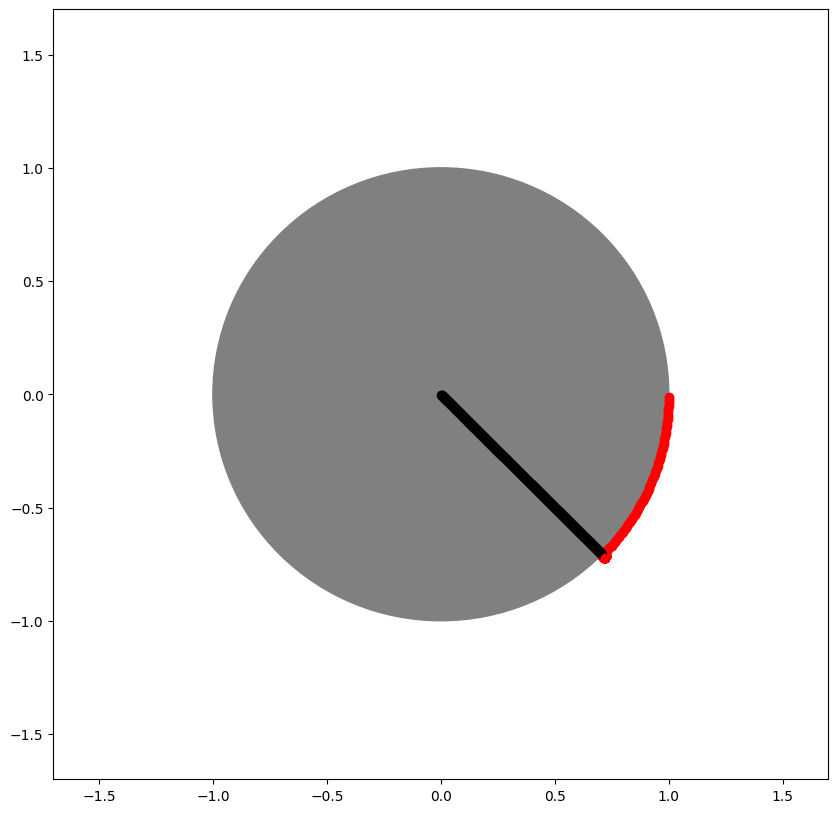

In [33]:
swan = 0
cat = 1

def theta():
    global cat, swan
    if swan == 0 or cat == 0:
        return 0
    tmp = swan.real * cat.imag - swan.imag * cat.real
    if tmp == 0:
        return 1
    else:
        return tmp / abs(tmp)

def v_cat():
    t = theta()
    v = 0
    if t <= 0:
        v = cos(arg(cat) + pi / 2) + 1j * sin(arg(cat) + pi / 2)
    else:
        v = cos(arg(cat) - pi / 2) + 1j * sin(arg(cat) - pi / 2)
    return 4 * v

def v_swan():
    omega_tick = arg(v_cat())
    v_a = sqrt(1 - omega_tick ** 2)

    # This should be close to 1
    print(v_a * v_a + omega_tick * omega_tick)

    return (1 - 1j) / sqrt(2)

points = []
dt = 0.0025

for i in range(1000):
    swan += v_swan() * dt
    cat += v_cat() * dt
    points.append((swan, cat))
    if abs(cat - swan) < 10 * dt:
        print("The swan was caught")
        break
    elif abs(swan) >= 1.:
        print("The swan flew away")
        break

circle = plt.Circle((0, 0), 1, color='gray')
fig, ax = plt.subplots(figsize=(10, 10))
for (swan, cat) in points:
    plt.plot(swan.real, swan.imag, 'o', color='black')
    plt.plot(cat.real, cat.imag, 'o', color='red')

ax.add_patch(circle)
ax.set_xlim([-1.7, 1.7])
ax.set_ylim([-1.7, 1.7])

;